In [13]:
%%capture
%run 'initialization.ipynb'

In [14]:
import datetime

In [15]:
def volatility():
    return 0
test = aapl_days[0]#.set_index('Hour')

In [16]:
new_test = aapl_days[0]
new_test

,Hour,Open,High,Low,Close,Volume
Day,,,,,,
2021-08-02,09:00:00,146.3607,146.4606,146.3607,146.4606,6475
2021-08-02,09:01:00,146.4506,146.5404,146.4007,146.5005,20827
2021-08-02,09:02:00,146.5005,146.5305,146.4805,146.5305,4227
2021-08-02,09:03:00,146.5404,146.5604,146.5105,146.5205,3198
2021-08-02,09:04:00,146.5205,146.5604,146.5205,146.5604,3503
...,...,...,...,...,...,...
2021-08-02,15:55:00,145.3772,145.3822,145.2873,145.2923,216938
2021-08-02,15:56:00,145.2923,145.3273,145.2424,145.2523,237200
2021-08-02,15:57:00,145.2424,145.3123,145.2324,145.3122,259082


In [17]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

<ipython-input-17-b884d7788ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [18]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

<ipython-input-18-b884d7788ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [19]:
new_test['Pct Change'].mean()

-0.001811202504217415

In [20]:
test[['Open', 'Hour']].apply(func=lambda x: (x.iloc[3::6] - x.iloc[::6]) / x.iloc[::6] * 100, axis=1)

,Open
Day,
2021-08-02,NaN
2021-08-02,NaN
2021-08-02,NaN
2021-08-02,NaN
2021-08-02,NaN
...,...
2021-08-02,NaN
2021-08-02,NaN
2021-08-02,NaN


In [21]:
# find number of minutes market is open for each day as a variable
hours_open = 7*60
len(np.arange(hours_open)) / 6

70.0

In [28]:
aapl_days[0]

,Hour,Open,High,Low,Close,Volume,Pct Change,Average
Day,,,,,,,,
2021-08-02,09:00:00,146.3607,146.4606,146.3607,146.4606,6475,NaN,-0.001842
2021-08-02,09:01:00,146.4506,146.5404,146.4007,146.5005,20827,0.061424,-0.001842
2021-08-02,09:02:00,146.5005,146.5305,146.4805,146.5305,4227,0.034073,-0.001842
2021-08-02,09:03:00,146.5404,146.5604,146.5105,146.5205,3198,0.027235,-0.001842
2021-08-02,09:04:00,146.5205,146.5604,146.5205,146.5604,3503,-0.013580,-0.001842
...,...,...,...,...,...,...,...,...
2021-08-02,15:55:00,145.3772,145.3822,145.2873,145.2923,216938,-0.010317,-0.001842
2021-08-02,15:56:00,145.2923,145.3273,145.2424,145.2523,237200,-0.058400,-0.001842
2021-08-02,15:57:00,145.2424,145.3123,145.2324,145.3122,259082,-0.034345,-0.001842


### Write a for loop that trades on each day in a stock array and calculates how much profit would be made using certain algorithms

In [ ]:
# 3 min average: should be done every 3 minutes in real-time
for test in aapl_days:
    # getting 3 minute intervals from 2 different indicies
    current_3 = test.iloc[3::6]['Open']
    previous_3 = test.iloc[::6]['Open']

    # percent change every 3 minutes
    temp = (((current_3 - previous_3) / previous_3) * 100.0)
    hmm = pd.DataFrame(data=temp)
    hmm['Index'] = test.iloc[::6]['Hour']
    #hmm['Index'].apply(lambda x: x.strftime("%H:%M:%S"))       # convert datetime to string
    hmm['Average'] = hmm['Open'].mean()

    # Calculate mean for each day and plot
    ax = hmm.plot('Index', 'Open')
    hmm.plot('Index', 'Average', ax=ax)
    ax.legend(['Pct Change', day['Average'][0]])

In [49]:
test

,Hour,Open,High,Low,Close,Volume,Pct Change,Average
Day,,,,,,,,
2021-08-12,09:00:00,145.610,145.610,145.5700,145.5700,15378,NaN,0.005646
2021-08-12,09:01:00,145.610,145.630,145.5769,145.6300,4700,0.000000,0.005646
2021-08-12,09:02:00,145.610,145.630,145.6000,145.6200,1801,0.000000,0.005646
2021-08-12,09:03:00,145.630,145.650,145.6300,145.6300,3975,0.013735,0.005646
2021-08-12,09:04:00,145.630,145.630,145.6300,145.6300,700,0.000000,0.005646
...,...,...,...,...,...,...,...,...
2021-08-12,15:55:00,148.950,149.000,148.9500,148.9715,680020,0.053738,0.005646
2021-08-12,15:56:00,148.980,149.030,148.9700,149.0100,476187,0.020141,0.005646
2021-08-12,15:57:00,149.010,149.050,149.0000,149.0450,404333,0.020137,0.005646


In [50]:
first = test['Open']
second = test['Open'].shift(1)
(first - second)/second * 100

Day
2021-08-12         NaN
2021-08-12    0.000000
2021-08-12    0.000000
2021-08-12    0.013735
2021-08-12    0.000000
                ...   
2021-08-12    0.053738
2021-08-12    0.020141
2021-08-12    0.020137
2021-08-12    0.023488
2021-08-12   -0.043611
Name: Open, Length: 420, dtype: float64

In [ ]:
# How far you deviate from a day's average should justify trading
# If you are deviating a lot up, short, if deviating down, buy
# The change every 3 minutes averages to 0
# Volume affects how quickly the Open price changes - low volume means prices stay stagnant
# Maybe only trade when volume is high enough to create volatility

<ipython-input-42-1bfe561e7bdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['Pct Change'] = ((day['Open'] - day['Open'].shift(1)) / day['Open'].shift(1)) * 100
<ipython-input-42-1bfe561e7bdc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['Average'] = day[day['Pct Change'] != 0]['Pct Change'].mean()
<ipython-input-42-1bfe561e7bdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

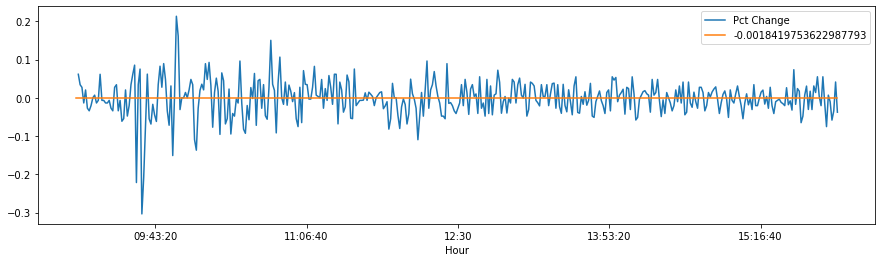

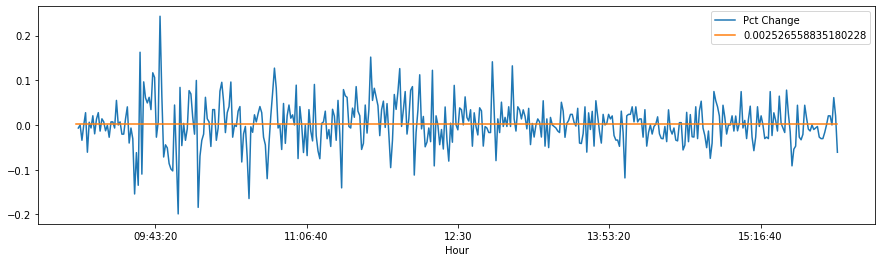

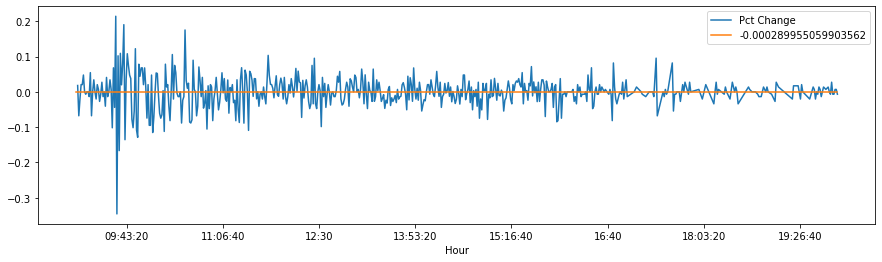

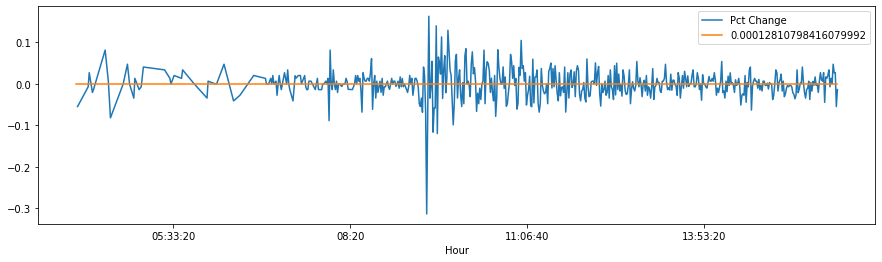

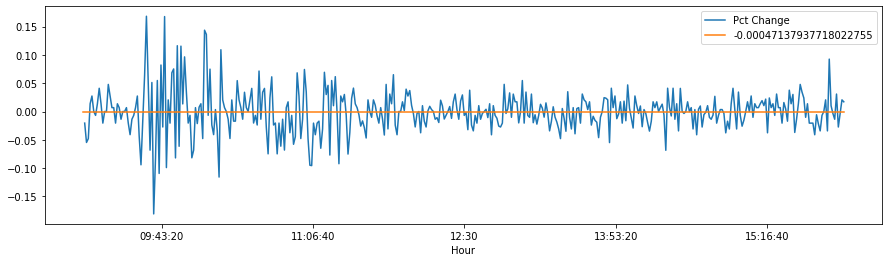

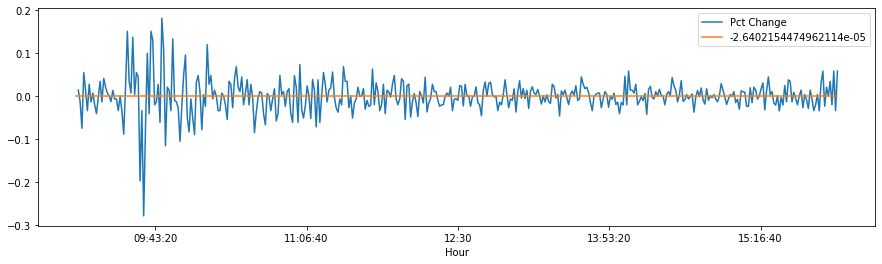

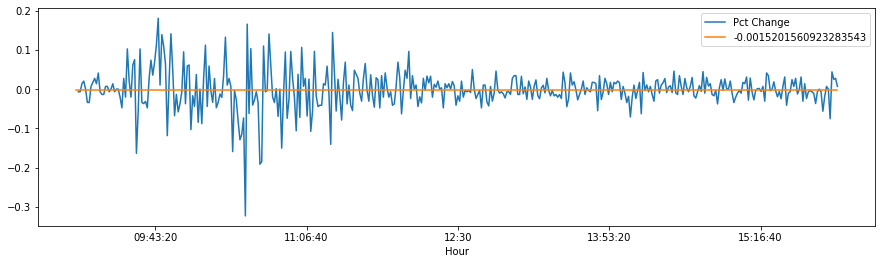

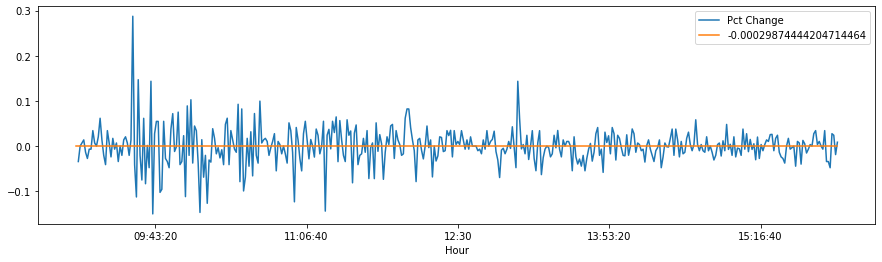

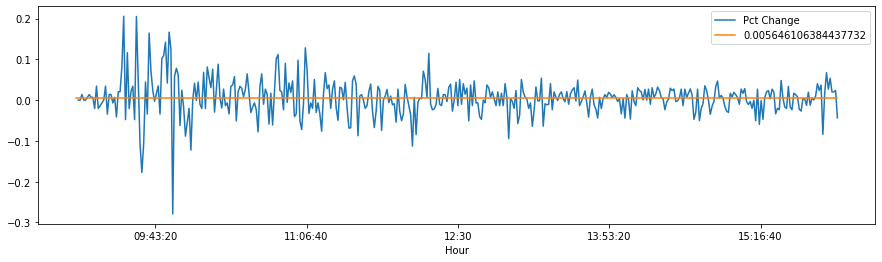

In [42]:
# Check one minute
# 1 min average: should be done every 1 minute in real-time
for day in aapl_days:
    # percent change every 1 minute
    day['Pct Change'] = ((day['Open'] - day['Open'].shift(1)) / day['Open'].shift(1)) * 100
    day['Average'] = day[day['Pct Change'] != 0]['Pct Change'].mean()

    # Calculate mean for each day and plot
    ax = day.plot('Hour', 'Pct Change')
    day.plot('Hour', 'Average', ax=ax, figsize=(15,4))
    ax.legend(['Pct Change', day['Average'][0]])

In [ ]:
hmm['Index'].apply(lambda x: x.strftime("%H:%M:%S"))

Day
2021-08-12    09:00:00
2021-08-12    09:06:00
2021-08-12    09:12:00
2021-08-12    09:18:00
2021-08-12    09:24:00
                ...   
2021-08-12    15:30:00
2021-08-12    15:36:00
2021-08-12    15:42:00
2021-08-12    15:48:00
2021-08-12    15:54:00
Name: Index, Length: 70, dtype: object

In [ ]:
hmm['Average'][0]

0.02609627844704002

In [ ]:
day = aapl_days[-1]
current = day['Open']
previous = day['Open']
# percent change every 3 minutes
change = (((current - previous) / previous) * 100.0)
change

Day
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
             ... 
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
2021-08-12    0.0
Name: Open, Length: 420, dtype: float64

In [ ]:
day

,Hour,Open,High,Low,Close,Volume,Pct Change,Average
Day,,,,,,,,
2021-08-12,09:00:00,145.610,145.610,145.5700,145.5700,15378,0.0000,5.4579e-05
2021-08-12,09:01:00,145.610,145.630,145.5769,145.6300,4700,0.0000,5.4579e-05
2021-08-12,09:02:00,145.610,145.630,145.6000,145.6200,1801,0.0000,5.4579e-05
2021-08-12,09:03:00,145.630,145.650,145.6300,145.6300,3975,0.0001,5.4579e-05
2021-08-12,09:04:00,145.630,145.630,145.6300,145.6300,700,0.0000,5.4579e-05
...,...,...,...,...,...,...,...,...
2021-08-12,15:55:00,148.950,149.000,148.9500,148.9715,680020,0.0005,5.4579e-05
2021-08-12,15:56:00,148.980,149.030,148.9700,149.0100,476187,0.0002,5.4579e-05
2021-08-12,15:57:00,149.010,149.050,149.0000,149.0450,404333,0.0002,5.4579e-05


In [ ]:
(day['Open'] / day['Open'].shift(1) - 1).fillna(0)

Day
2021-08-12    0.0000
2021-08-12    0.0000
2021-08-12    0.0000
2021-08-12    0.0001
2021-08-12    0.0000
               ...  
2021-08-12    0.0005
2021-08-12    0.0002
2021-08-12    0.0002
2021-08-12    0.0002
2021-08-12   -0.0004
Name: Open, Length: 420, dtype: float64